# Filtering: removing artifacts in Beam Propagation Method

For Rayleigh-Sommerfeld approach, masks are considered using Thin Element Approximation (TEA), that is, they are infinitely thin. This can be useful in many situations, but does not allow determining the field inside elements.

With Beam Propagation Method, we define an XZ plane with a background index (n=1 for vaccum, for example) and insert optical elements considering its shape and refraction index. We also need to include the input scalar field and propagate. Since the field is computed sequentially, no multiprocessing is possible for determining the u(x,z) field in monocromatic, single field. 

One disventage of this technique is that no reflections are considered, although perhaps they can be included in the future.

One of the limits of Beam Propagation method is the resolution in the grid of x,z. If the grid is not enough, for example, in a phase mask like a lens, the shape is not considered continuous but with edges. In this case, edges produce a discontinuity that proagates.

In [1]:
from diffractio import degrees, mm, plt, sp, um, np

from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

%matplotlib inline  

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=(6,4)
rcParams['figure.dpi']=150

## Bad computation with BPM

In [3]:
# WITH BAD RESOLUTION
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-100 * um, 600 * um, 512 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=200 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
u1.clear_field()

185.18518518518516


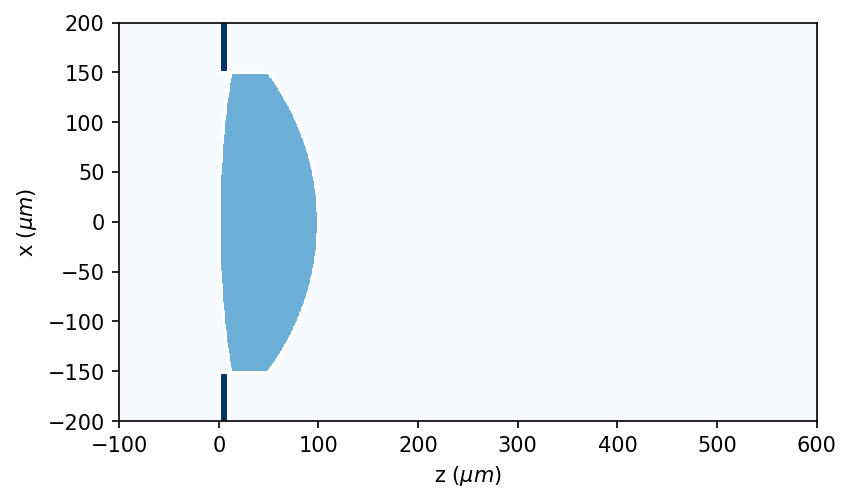

In [4]:
print(focal)
u1.draw_refraction_index(scale='scaled');
edge_matrix=u1.borders

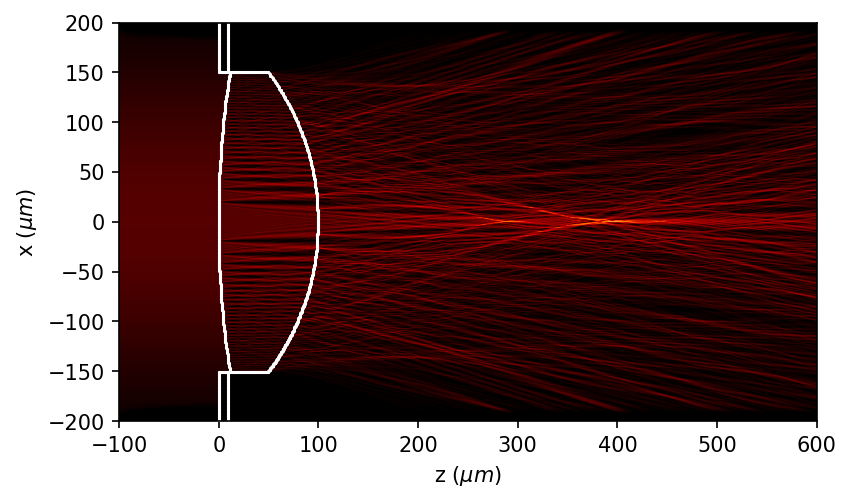

In [5]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled');

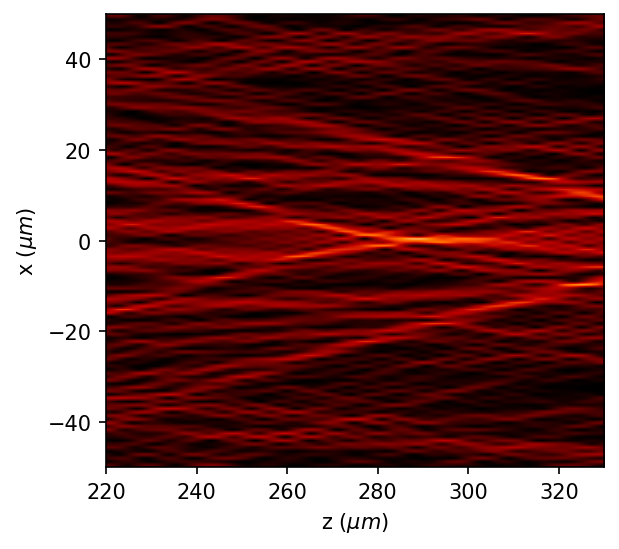

In [6]:
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.ylim(-50,50)
plt.xlim(220,330);

## Better resolution

In [7]:
# WITH GOOD RESOLUTION
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(-100 * um, 600 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=200 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))


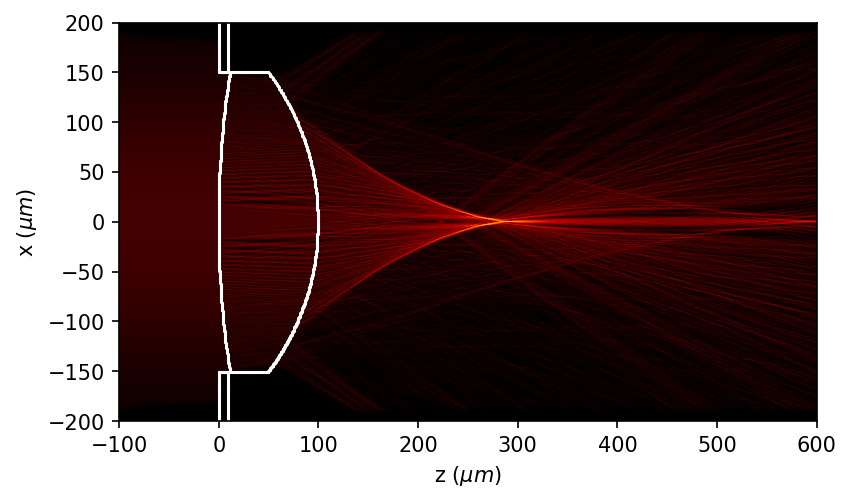

In [8]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled',
        edge_matrix=edge_matrix);

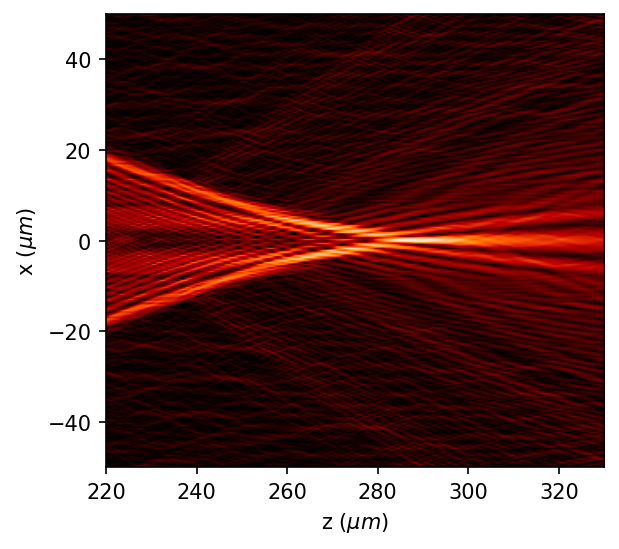

In [9]:
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.ylim(-50,50)
plt.xlim(220,330);

## Effect of filtering

In [10]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(-100 * um, 600 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=200 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))

In [11]:
u1.filter_refraction_index(pixels_filtering=10,type_filter=2)
u1.BPM(verbose=False)

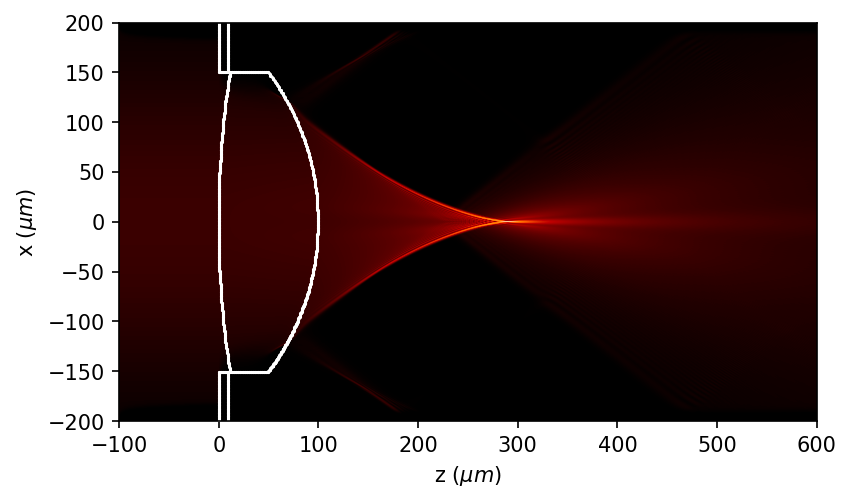

In [12]:
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled',
       edge_matrix=edge_matrix);

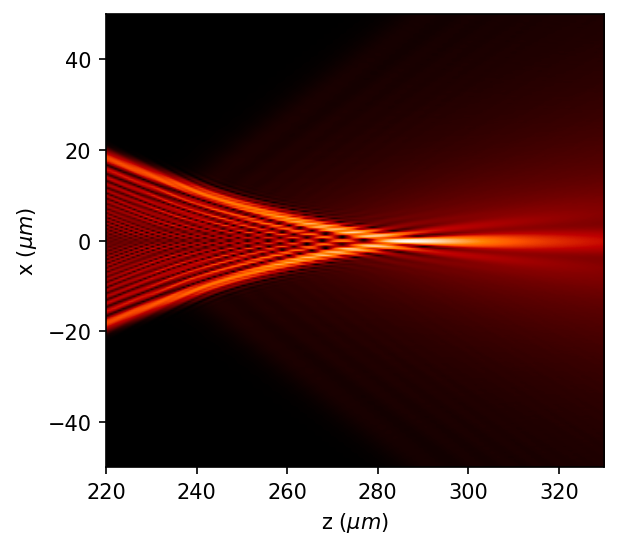

In [13]:
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.ylim(-50,50)
plt.xlim(220,330);